# Extracting All Webpages

This script automates the process of navigating to specific URLs and extracting HTML content using Python's Selenium library. The script accesses a series of web pages from a base URL with varying offsets, captures their HTML source, and saves it to local files.


## How the Script Works

- **Base URL**: `https://www.lowes.com/pl/fall-decorations/fall-wreaths-garland/1614047588`
- **Offsets**: Created to generate pages at intervals of 24, ranging from 0 to 144.
- An array `urls` is constructed by appending each offset to the base URL.
- For each URL in the `urls` list, the script configures a headless Chrome browser.
- The `user-agent` is set to mimic a desktop browser to prevent being identified as a bot.
- The script waits explicitly for the body tag of the page to ensure the page is fully loaded.
- After an additional delay of 10 seconds, the HTML of the page is captured.
- This HTML content is then written to a sequentially numbered file.

### Output
- The script logs the completion of each page's processing to the console.
- HTML files are saved in the format `html_pages/page_{n}.html`, where `{n}` is the page number starting from 0.

## Potential Improvements
- WebDriver should crawl all links in one session, instead of crawling each page separately in separate sessions
- WebDriver should be able to click next page button to navigate to next web page, instead of using offsets in URL
- For faster crawling, should be able to use scrapy with playwright instead of selenium
- Handling exceptions to manage errors during web navigation.
- Using session and cookies to maintain login states if needed.
- Implementing a more robust waiting mechanism instead of a fixed sleep interval.

## Usage
- Selenium and ChromeWebdriver is installed
- ensure there exists a folder with name "html_pages", in the same directory as this jupyter file.
- The script can be executed within a Python environment where Selenium is installed, and it will handle the crawling automatically.


In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time

# Base URL
base_url = "https://www.lowes.com/pl/fall-decorations/fall-wreaths-garland/1614047588"

# Create an array of URLs with offsets of 24 up to 144
offsets = range(0, 145, 24)  # Generates 0, 24, 48, ..., 144
urls = [f"{base_url}?offset={offset}" for offset in offsets]

# Initialize page count
page_count = 0

for url in urls:
    # Setting up Chrome options for Selenium within the loop
    options = Options()
    options.headless = True  # Run headless for automation environments
    options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36')

    # Set up the Chrome driver
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=options)

    # Navigate to the page
    driver.get(url)

    # Wait for the page to load completely
    WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    time.sleep(10)  # Additional wait time to ensure all scripts and content have loaded

    # Extract the entire HTML of the page
    html_content = driver.page_source

    # Save the HTML content to a file
    with open(f'html_pages/page_{page_count}.html', 'w', encoding='utf-8') as f:
        f.write(html_content)

    print(f"Saved page {page_count} from URL: {url}")  # Log the saved page info

    # Prepare for the next page
    page_count += 1

    # Clean up: close the browser window for each URL
    driver.quit()



Saved page 0 from URL: https://www.lowes.com/pl/fall-decorations/fall-wreaths-garland/1614047588?offset=0
Saved page 1 from URL: https://www.lowes.com/pl/fall-decorations/fall-wreaths-garland/1614047588?offset=24
Saved page 2 from URL: https://www.lowes.com/pl/fall-decorations/fall-wreaths-garland/1614047588?offset=48
Saved page 3 from URL: https://www.lowes.com/pl/fall-decorations/fall-wreaths-garland/1614047588?offset=72
Saved page 4 from URL: https://www.lowes.com/pl/fall-decorations/fall-wreaths-garland/1614047588?offset=96
Saved page 5 from URL: https://www.lowes.com/pl/fall-decorations/fall-wreaths-garland/1614047588?offset=120
Saved page 6 from URL: https://www.lowes.com/pl/fall-decorations/fall-wreaths-garland/1614047588?offset=144


# Scrapy Product Links Extractor

This script is a Scrapy spider designed to extract links from a series of locally stored HTML pages. It navigates through each file, extracts specific links based on CSS selectors, and saves them to a text file, ensuring that each link is unique and correctly formatted.


## How the Script Works


### Methods
- **start_requests**:
  - The method generates requests to each local HTML file stored in the directory `html_pages`.
  - It loops through a range of file indices to construct file paths dynamically.
  - Each file path is formatted to be understood as a local URL by Scrapy.

- **parse**:
  - Extracts all links from the page using a specified CSS selector.
  - Filters out duplicate links using a set.
  - Prepends the base URL to relative links to convert them into absolute URLs.
  - Appends each unique link to a file, ensuring it starts on a new line.

### Running the Spider
- An instance of `CrawlerProcess` is created with a configuration to set the logging level to INFO.
- The spider is added to this process and then started, initiating the crawling operation.
- A text file (`extracted_links.txt`) containing all unique links extracted from the provided HTML files, each on a new line.

## Usage
- Ensure that Scrapy is installed and that the HTML files are properly placed in the `html_pages` directory.
- **Delete file 'extracted_links.txt', if exists**
- The script can be executed within a Python environment where Scrapy is installed, and it will handle the crawling and link extraction automatically.

## Potential Improvements
- Enhance error handling to manage missing files or inaccessible paths.
- Implement more dynamic file discovery rather than assuming a fixed range of file names.
- Include functionality to handle and log exceptions, especially in cases of malformed URLs or extraction failures.


In [8]:
!python3 scrapy_get_product_links.py

2024-11-16 15:56:21 [scrapy.utils.log] INFO: Scrapy 2.11.2 started (bot: scrapybot)
2024-11-16 15:56:21 [scrapy.utils.log] INFO: Versions: lxml 5.3.0.0, libxml2 2.12.9, cssselect 1.2.0, parsel 1.9.1, w3lib 2.2.1, Twisted 24.10.0, Python 3.10.0 (v3.10.0:b494f5935c, Oct  4 2021, 14:59:19) [Clang 12.0.5 (clang-1205.0.22.11)], pyOpenSSL 24.2.1 (OpenSSL 3.3.2 3 Sep 2024), cryptography 43.0.3, Platform macOS-13.0.1-arm64-arm-64bit
2024-11-16 15:56:21 [scrapy.addons] INFO: Enabled addons:
[]
2024-11-16 15:56:21 [py.warnings] WARNING: /Users/akshaysharma/Desktop/Daash/myenv/lib/python3.10/site-packages/scrapy/utils/request.py:254: ScrapyDeprecationWarning: '2.6' is a deprecated value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting.

It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reasons, but it will change in a future version of Sc

# Scrapy Product Details Extraction


This Python script utilizes the Scrapy framework to extract product model numbers, brands, and prices from web pages. The URLs are read from a local text file. The extracted data is saved to a CSV file for further analysis or use.


## Functionality

### Methods

#### `start_requests`
- Opens the `extracted_links.txt` file to read URLs.
- Generates Scrapy Requests for each URL, setting up appropriate headers to mimic a web browser.

#### `parse`
- Asynchronous method to handle the response from each request.
- Uses XPaths to extract the model number and product name from the webpage.
- Attempts to parse embedded JSON within the webpage to extract the pricing information.
- Outputs the product model number, brand, and price to the console and yields this data in a structured form.


## Output
- The data is saved in `product_details.csv` using Scrapy's feed export functionality.

## Running the Script
- Ensure the file 'extracted_links.txt' exists with all the product URLs
- The script is set to run automatically when executed, initiating the `ProductModelSpider`.
- It uses Scrapy's `CrawlerProcess` to configure settings such as output file format and log level.

## Potential Enhancements
- Implement more robust error handling and data validation to handle unexpected webpage structures or data formats.
- Expand the capabilities to handle dynamic content loaded via JavaScript by integrating Scrapy with a browser automation tool like Selenium.
- Improve the efficiency of the spider by managing request headers and using delay settings to comply with the target website's rate limits.


In [5]:
!python3 scrapy_get_product_details.py

2024-11-16 20:05:33 [scrapy.utils.log] INFO: Scrapy 2.11.2 started (bot: scrapybot)
2024-11-16 20:05:33 [scrapy.utils.log] INFO: Versions: lxml 5.3.0.0, libxml2 2.12.9, cssselect 1.2.0, parsel 1.9.1, w3lib 2.2.1, Twisted 24.10.0, Python 3.10.0 (v3.10.0:b494f5935c, Oct  4 2021, 14:59:19) [Clang 12.0.5 (clang-1205.0.22.11)], pyOpenSSL 24.2.1 (OpenSSL 3.3.2 3 Sep 2024), cryptography 43.0.3, Platform macOS-13.0.1-arm64-arm-64bit
2024-11-16 20:05:33 [scrapy.addons] INFO: Enabled addons:
[]
2024-11-16 20:05:33 [py.warnings] WARNING: /Users/akshaysharma/Desktop/Daash/myenv/lib/python3.10/site-packages/scrapy/utils/request.py:254: ScrapyDeprecationWarning: '2.6' is a deprecated value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting.

It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reasons, but it will change in a future version of Sc

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
df = pd.read_csv('product_details.csv')

# Drop rows where the price is 0
df = df[df['Product Price'] != 0]
df

,Product Model Number,Product Name,Product Price
0,HC7-104-24W,National Tree Company,49.98
1,RAHV-DA102W-1,National Tree Company,44.88
2,2005500067,Glitzhome,40.46
3,35762377,Northlight,62.98
4,7370,Worth Imports,29.98
...,...,...,...
84,W1248,Nearly Natural,55.65
85,W1153,Nearly Natural,56.48
86,W1226,Nearly Natural,70.02
88,W1239,Nearly Natural,129.00


In [2]:
# Count wreaths by brand
wreaths_by_brand = df['Product Name'].value_counts()
wreaths_by_brand

Product Name
Nearly Natural            24
Worth Imports             16
Northlight                12
National Tree Company      9
Glitzhome                  8
Sullivans                  8
Product name not found     2
Puleo International        1
Glitzhome,                 1
Gerson International       1
Nature Spring              1
Name: count, dtype: int64

In [3]:
# Find the price range for wreaths
print(f"Price range for wreaths: ${df['Product Price'].min()} - ${df['Product Price'].max()})")


Price range for wreaths: $19.27 - $174.7)


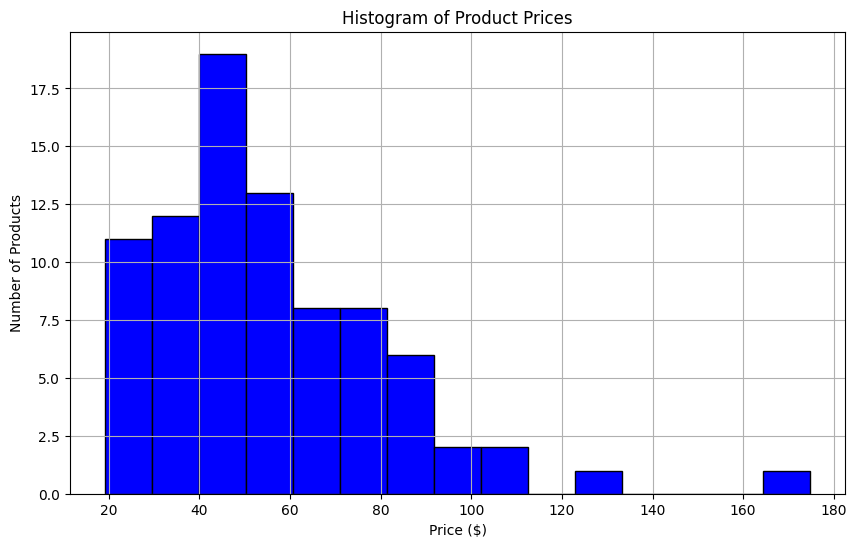

In [4]:
# Plotting the histogram of product prices
plt.figure(figsize=(10, 6))
plt.hist(df['Product Price'], bins=15, color='blue', edgecolor='black')
plt.title('Histogram of Product Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()
